# Beginning Astronomy: Start a Data-Driven Journey

# Hands-on session on constructing Open Cluster CMDs with Gaia

In this session, we will connect with the Gaia Space Telescope Server to download observed data at the position of a specific open cluster (OC). We will then select the cluster members based on its proper motion and parallax values. We will plot the Colour Magnitude Diagram (CMD) of this OC with Gaia filters.  

**On Google colab:** This is an online service where we can run Python code online. This is based on Jupyter notebooks (a similar service that can be run on your computers).

## Using this notebook

Here are the most important things to know:

1. Notebooks are made up of code cells and text cells (and a few other less common kinds).  Code cells contain code; text cells, like this one, contain explanatory text written in [Markdown](https://www.markdownguide.org/).

2. To run a code cell, click the cell to select it and press Shift-Enter.  The output of the code should appear below the cell.

3. In general, notebooks only run correctly if you run every code cell in order from top to bottom.  If you run cells out of order, you are likely to get errors.

4. You can modify existing cells, but then you have to run them again to see the effect.

5. You can add new cells, but again, you have to be careful about the order you run them in.

6. If you have added or modified cells and the behavior of the notebook seems strange, you can restart the "kernel", which clears all of the variables and functions you have defined, and run the cells again from the beginning.

* In Colab, open the `Runtime` menu and select "Restart and run all"


## Installing libraries

Run the following cell to install the libraries we'll need.

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 61.0 MB/s eta 0:00:00


## Connecting to Gaia

The library we'll use to get Gaia data is [Astroquery](https://astroquery.readthedocs.io/en/latest/).
Astroquery provides `Gaia`, which is an [object that represents a connection to the Gaia database](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html).

We can connect to the Gaia database like this:

In [2]:
from astroquery.gaia import Gaia

## Databases and Tables

But what is a database?  
* A database is a collection of one or more named tables.

* Each table is a 2-D array with one or more named columns of data.

We can use `Gaia.load_tables` to get the names of the tables in the Gaia database.  With the option `only_names=True`, it loads information about the tables, called "metadata", not the data itself.

In [3]:
tables = Gaia.load_tables(only_names=True)

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]


The following `for` loop prints the names of the tables.

In [4]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_varia

The one we will use is:

* `gaiadr3.gaia_source_lite`, which contains Gaia data from [data release 3](https://www.cosmos.esa.int/web/gaia/data-release-3),

We can use `load_table` (not `load_tables`) to get the metadata for a single table.  The name of this function is misleading, because it only downloads metadata, not the contents of the table.

In [5]:
meta = Gaia.load_table('gaiadr3.gaia_source_lite')
meta

Retrieving table 'gaiadr3.gaia_source_lite'


The result is an object of type `TapTableMeta`, but it does not display the contents.

To see the metadata, we have to print the object.

In [6]:
print(meta)

TAP Table name: gaiadr3.gaiadr3.gaia_source_lite
Description: This is a column-wise subset of the gaia_source table named gaia_source_lite. This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Num. columns: 51


The following loop prints the names of the columns in the table.

In [7]:
for column in meta.columns:
    print(column.name)

source_id
random_index
ra
dec
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
astrometric_params_solved
pseudocolour
pseudocolour_error
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_mean_flux_over_error
phot_bp_mean_mag
phot_rp_mean_flux_over_error
phot_rp_mean_mag
phot_bp_rp_excess_factor
bp_rp
radial_velocity
radial_velocity_error
rv_nb_transits
rv_expected_sig_to_noise
rv_renormalised_gof
rv_chisq_pvalue
phot_variable_flag
l
b
in_qso_candidates
in_galaxy_candidates
non_single_star
has_xp_continuous
has_xp_sampled
has_rvs
has_epoch_photometry
has_epoch_rv
has_mcmc_gspphot
has_mcmc_msc
in_andromeda_survey
teff_gspphot
logg_gspphot
mh_gspphot
distance_gspphot
ag_gspphot
ebpminrp_gspphot


To find out what the columns mean, [read the documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html).

## Writing queries

The tables are quite large, so we will use queries to select only the data we want.

For the Gaia database, the query language is ADQL (Astronomical Data Query Language).

We run a query to select stars in a particular region of the sky (this is called a cone search). Here is a query that selects objects in a circular region centered at (29.395071, 37.833392) with a search radius of 20 arcmin (0.33332 deg). This is the center of the open cluster [NGC 752](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=NGC+752&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id). Only the specified columns are downloaded.

In [8]:
query_cone = """SELECT
source_id, ra, dec, pmra, pmdec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(29.395071, 37.833392, 0.33332))
"""

job = Gaia.launch_job_async(query_cone)
results = job.get_results()
results

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas / yr,mas / yr,mas,mag,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32,float32
342535946938722432,29.07433708193626,37.62081496989479,2.3874058592655474,-2.955787821367104,0.027289464448902758,20.250156,20.502995,19.063765
342537042154497408,29.029509283417436,37.68135662012215,13.266568760971372,-6.7399818918377825,2.981476368081155,17.823837,19.308306,16.624693
342537076518123392,29.03748669833818,37.67727796837761,12.503362617606872,-3.830031876251965,1.6734286420918185,20.212187,20.57587,18.780458
342535942643313024,29.0701901266451,37.6275586836767,9.875909149244196,-30.660616477929064,1.3243844290416014,19.856348,20.880175,18.53631
342532678468167808,29.12635846120631,37.5911640095568,2.308386167417056,-5.941612369202193,0.36955933524176016,19.97412,20.117762,18.826515
342536221815626624,29.051579072524163,37.64695358593457,14.213211062179955,-0.9715151509105139,0.26099529450364456,20.225595,21.479565,18.838295
342531853833941376,29.150336374317643,37.567869150093294,4.888306553002546,-2.4827498647093402,0.21745064622811175,18.111801,18.405634,17.612091
342536050016583680,29.068271511241733,37.64309529413254,-11.323015658247709,-0.362651723682469,1.594405953409376,19.035883,19.972755,17.826656


## Saving results

This is the set of stars we'll work with in the next step.

Storing the data in a file means we can shut down this notebook and pick up where we left off without running the previous query again.

Astropy `Table` objects provide `write`, which writes the table to disk.

In [9]:
filename = 'NGC752_gaiadr3.fits'
results.write(filename, overwrite=True)

Because the filename ends with `fits`, the table is written in the [FITS format](https://en.wikipedia.org/wiki/FITS), which preserves the metadata associated with the table.

If the file already exists, the `overwrite` argument causes it to be overwritten.

We can use `getsize` to confirm that the file exists and check the size:

In [10]:
from os.path import getsize

MB = 1024 * 1024
getsize(filename) / MB

0.208740234375

Now here's how we can read the data from the file back into an Astropy `Table`:

In [11]:
from astropy.table import Table

filename = 'NGC752_gaiadr3.fits'
results = Table.read(filename)

results.info

<Table length=3431>
      name        dtype    unit                              description                                class     n_bad
---------------- ------- -------- ------------------------------------------------------------------ ------------ -----
       source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn     0
              ra float64      deg                                                    Right ascension       Column     0
             dec float64      deg                                                        Declination       Column     0
            pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn   536
           pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn   536
        parallax float64      mas                                                           Parallax MaskedColumn   536
 phot_g_mean_mag flo

## Diagnostic plots

To see what the results look like, we'll use scatter plots and a histogram. The library we'll use is [Matplotlib](https://matplotlib.org/), which is the most widely-used plotting library for Python. We will import like this.

In [12]:
import matplotlib.pyplot as plt

Pyplot is part of the Matplotlib library.  It is conventional to import it using the shortened name `plt`.

Here's a scatter plot of the spatial distribution of the sources in the cone with right ascension on the x-axis and declination on the y-axis, both are in degrees.

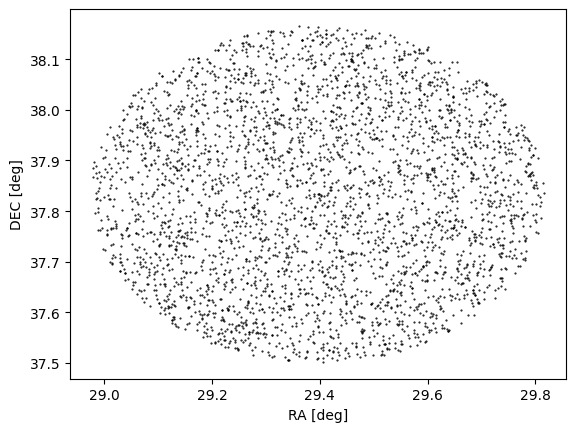

In [13]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

The following figure is a scatter plot of proper motion.

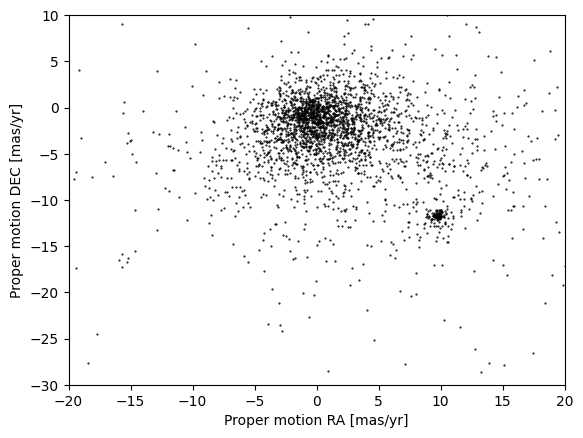

In [14]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

The following is a histogram of the parallax of the sources in this cone

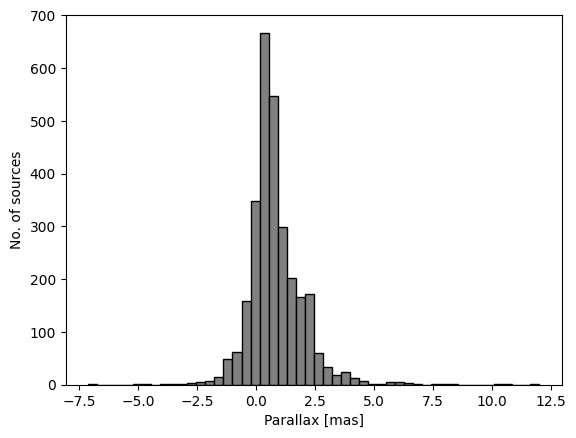

In [15]:
plx = results['parallax']

plt.hist(plx,bins=50,facecolor='grey',edgecolor='k')
#plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

The following figure is a scatter plot of the CMD (Colour Magnitude Diagram) of sources in this cone.

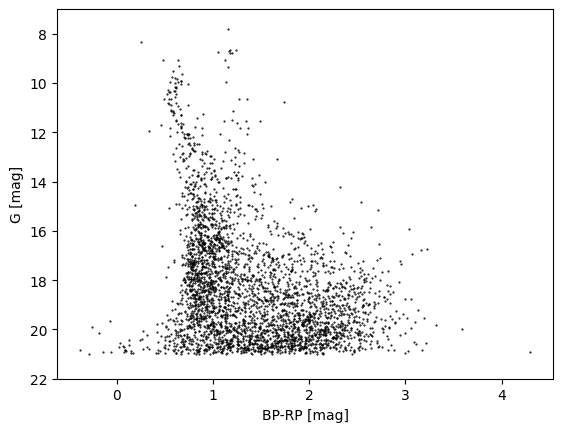

In [16]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)

plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

#Selecting cluster members

We will use known proper motion and parallax properties of the cluster to select cluster members.

For NGC 752, select sources with the following criteria:
*   8.8 < PMRA < 10.8
*   -12.6 < PMDEC <-11.1
*   2.05 < PLX < 2.45

We need to import the widely used [Numpy](https://numpy.org/) python library, which includes a number of numerical functions. It is conventional to import it using the shortened name `np`.

The selection is done below:

In [17]:
import numpy as np
members=np.where((pmra>8.8)&(pmra<10.8)&(pmdec>-12.6)&(pmdec<-11.1)&(plx>2.05)&(plx<2.45))


Now plot the selected members (red) with all the cone-search sources (black) as in the previous scatter plots and histogram.

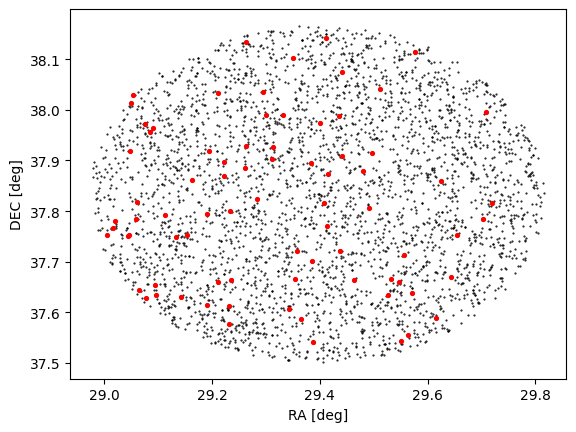

In [18]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)
plt.scatter(ra[members], dec[members], color='r',marker='.', s=30)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

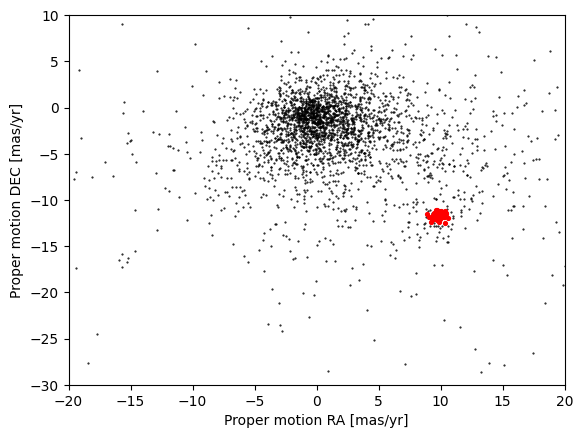

In [19]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)
plt.scatter(pmra[members], pmdec[members], color='r',marker='.', s=30)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

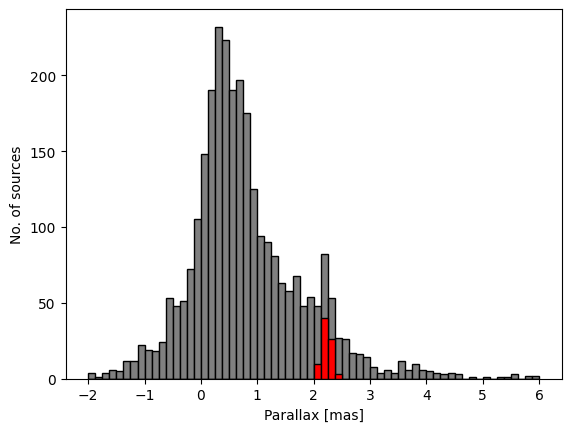

In [20]:
plx = results['parallax']

plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')
plt.hist(plx[members],bins=64,range=[-2,6], facecolor='r',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

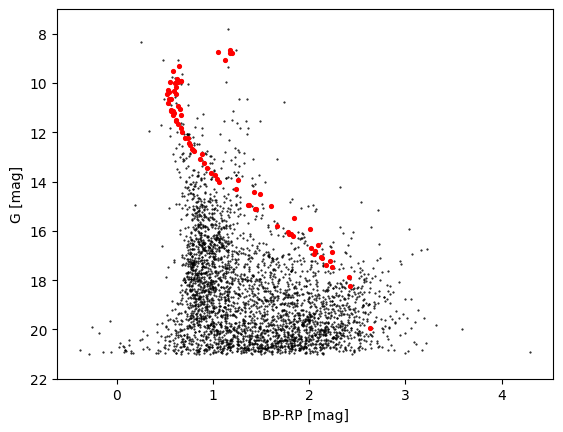

In [21]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)
plt.scatter(color[members], gmag[members], color='r',marker='.', s=30)


plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

Note the clean CMD of the cluster members. See the Main-sequence, the Main-sequence Turn-off, the giants and the binary track.

#Exercise

Import Gaia data (within 20 arcmin) and plot similar scatter plots for the following OCs:

1.   [NGC 7044](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=NGC+7044&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id) (Center: 318.289218, 42.496200; -5.5 < PMRA < -4.5; -6 < PMDEC < -4.9 ; 0.08 < PLX < 0.49)
2.   [NGC 7142](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=NGC+7142&submit=submit+id) (Center: 326.289622, 65.774452; -3.2 < PMRA < -2.4; -1.6 < PMDEC < -0.9; 0.28 < PLX < 0.52)
3.   [NGC 6791](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=NGC+6791&submit=submit+id) (Center: 290.221755, 37.771895; -0.9 < PMRA < 0.15; -2.8 < PMDEC < -1.6; 0 < PLX < 0.42)



##1.1  NGC 7044

In [22]:
query_cone = """SELECT
source_id, ra, dec, pmra, pmdec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(318.289218, 42.496200, 0.33332))
"""

job = Gaia.launch_job_async(query_cone)
results = job.get_results()
results

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas / yr,mas / yr,mas,mag,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32,float32
1969022877774193536,318.1835996160766,42.17334747670316,-9.463122147307462,-3.5713668109423455,0.011364076933783978,17.10391,17.951944,16.13169
1969022980848160640,318.1906738715662,42.19646790432816,-3.015310380488945,-2.723474195451386,-0.5053653694550746,18.859446,19.98571,17.755514
1969022912129473152,318.2075379053188,42.186527248247664,-3.779256816197262,-3.649335341755338,-0.2511954488774726,19.729195,20.762587,18.645441
1969022980848170112,318.1829010250265,42.20010279744263,0.41619205347985694,1.0417113049487647,0.2704067701116917,19.389328,20.363539,18.289537
1969022916430185856,318.200782881307,42.17866147553351,--,--,--,21.148487,--,--
1969022882070508800,318.1789083800799,42.17583618192063,--,--,--,21.300756,--,--
1969022950789926784,318.1747653502727,42.176223821621406,--,--,--,21.057705,--,--
1969022946488393728,318.17771052167666,42.18705559147054,-4.469668649830009,-1.8614817704657487,0.28541572665975834,18.905191,20.016687,17.882761


In [23]:
filename = 'NGC7044_gaiadr3.fits'
results.write(filename, overwrite=True)

In [24]:
from os.path import getsize

MB = 1024 * 1024
getsize(filename) / MB

2.2467041015625

In [25]:
from astropy.table import Table

filename = 'NGC7044_gaiadr3.fits'
results = Table.read(filename)

results.info

<Table length=39057>
      name        dtype    unit                              description                                class     n_bad
---------------- ------- -------- ------------------------------------------------------------------ ------------ -----
       source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn     0
              ra float64      deg                                                    Right ascension       Column     0
             dec float64      deg                                                        Declination       Column     0
            pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn  4927
           pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn  4927
        parallax float64      mas                                                           Parallax MaskedColumn  4927
 phot_g_mean_mag fl

In [26]:
import matplotlib.pyplot as plt

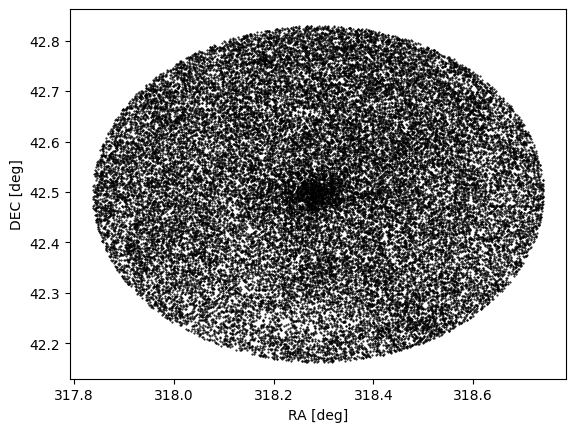

In [27]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

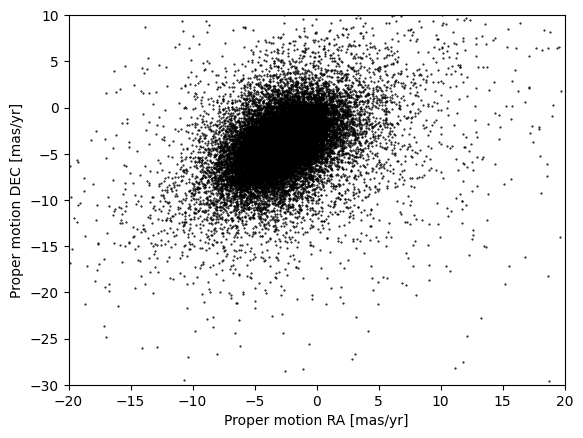

In [28]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

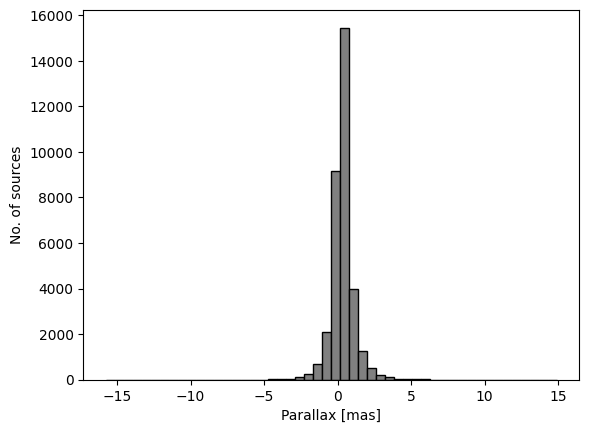

In [29]:
plx = results['parallax']

plt.hist(plx,bins=50,facecolor='grey',edgecolor='k')
#plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

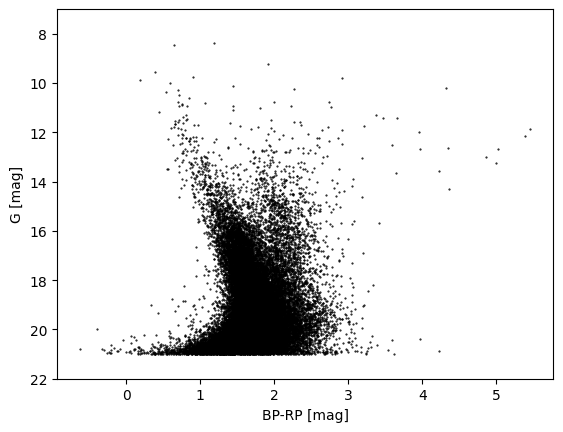

In [30]:

color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)

plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

In [31]:
import numpy as np

In [32]:
members=np.where((pmra>-5.5)&(pmra<-4.5)&(pmdec>-6)&(pmdec<-4.9)&(plx>0.08)&(plx<0.49))

2448


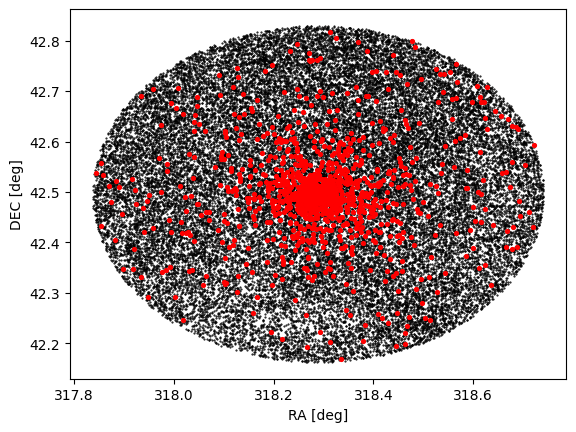

In [33]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)
plt.scatter(ra[members], dec[members], color='r',marker='.', s=30)
print(len(ra[members])+ len(dec[members]))
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

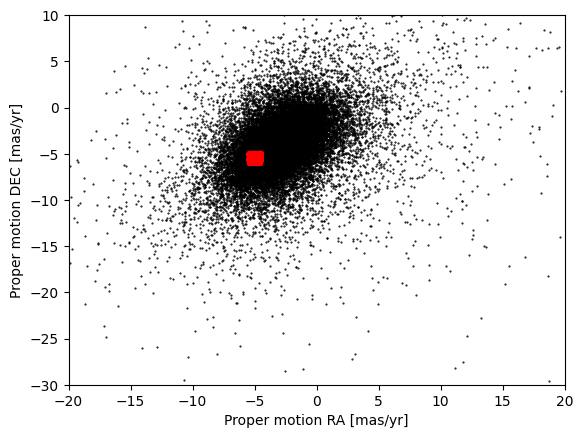

In [34]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)
plt.scatter(pmra[members], pmdec[members], color='r',marker='.', s=30)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

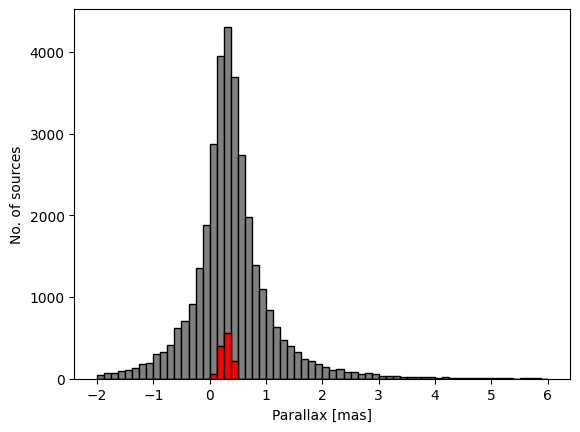

In [35]:
plx = results['parallax']

plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')
plt.hist(plx[members],bins=64,range=[-2,6], facecolor='r',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

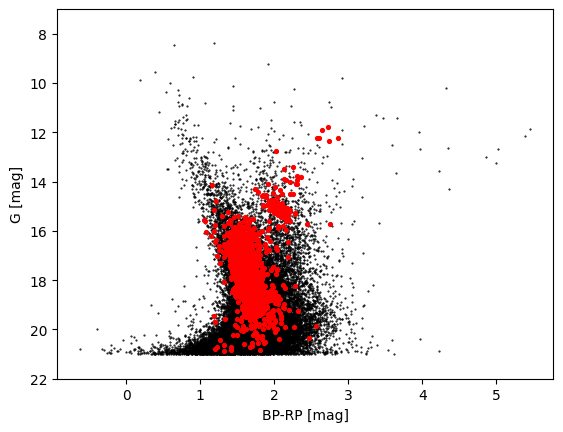

In [36]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)
plt.scatter(color[members], gmag[members], color='r',marker='.', s=30)


plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

##1.2 NGC 7142

In [37]:
query_cone = """SELECT
source_id, ra, dec, pmra, pmdec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(326.289622, 65.774452, 0.33332))
"""

job = Gaia.launch_job_async(query_cone)
results = job.get_results()
results

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas / yr,mas / yr,mas,mag,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32,float32
2219448951783656064,326.93954285937167,65.94519033317462,-2.6344991140327645,-1.6695176508836211,-0.06682921262651569,18.778482,19.412928,17.97952
2219452254610538752,326.87997634032666,66.00291178007828,-3.608687858008429,-2.852300052794406,0.2421852545245196,18.027033,18.512499,17.197458
2219448127149917440,326.98560529877284,65.92516347953617,-0.8442052491319878,-2.3039146548229037,0.8382856995510403,18.685215,19.46134,17.80471
2219448092790179456,327.01047025272027,65.9263126284808,-3.0737693384601226,-5.591960407316323,-0.230124656240232,19.950224,20.400078,18.996176
2219447787846444032,327.0365083513145,65.89831278927005,--,--,--,20.981169,21.73079,20.053177
2219436032521960704,327.05595387961176,65.87956299184277,-3.7685918206671016,-4.958718718833229,0.19660666371503016,18.322645,19.023941,17.520552
2219435761938019456,327.078618015989,65.85207498283886,-3.4957312252688086,-4.170704822873976,0.8015537237384401,20.676012,20.96371,19.689787
2219447787846443136,327.0295611949459,65.90169735970407,-0.5140442584986934,-0.8505019401953896,0.5684308527560026,20.542576,21.109076,19.896126


In [38]:
filename = 'NGC7142_gaiadr3.fits'
results.write(filename, overwrite=True)

In [39]:
from os.path import getsize

MB = 1024 * 1024
getsize(filename) / MB

0.9832763671875

In [40]:
from astropy.table import Table

filename = 'NGC7142_gaiadr3.fits'
results = Table.read(filename)

results.info

<Table length=16974>
      name        dtype    unit                              description                                class     n_bad
---------------- ------- -------- ------------------------------------------------------------------ ------------ -----
       source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn     0
              ra float64      deg                                                    Right ascension       Column     0
             dec float64      deg                                                        Declination       Column     0
            pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn  1570
           pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn  1570
        parallax float64      mas                                                           Parallax MaskedColumn  1570
 phot_g_mean_mag fl

In [41]:
import matplotlib.pyplot as plt

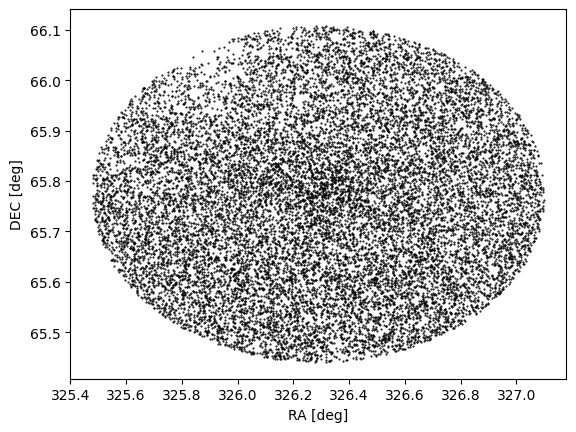

In [42]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

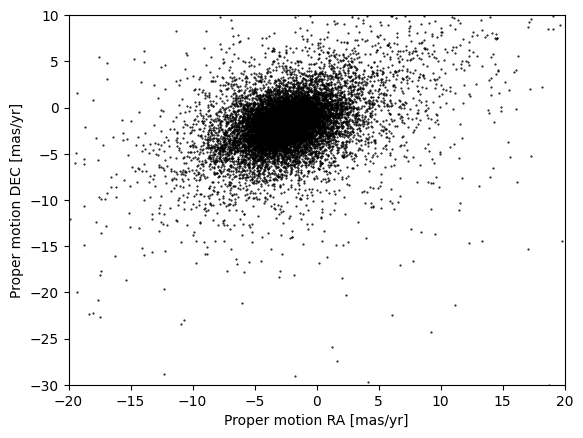

In [43]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

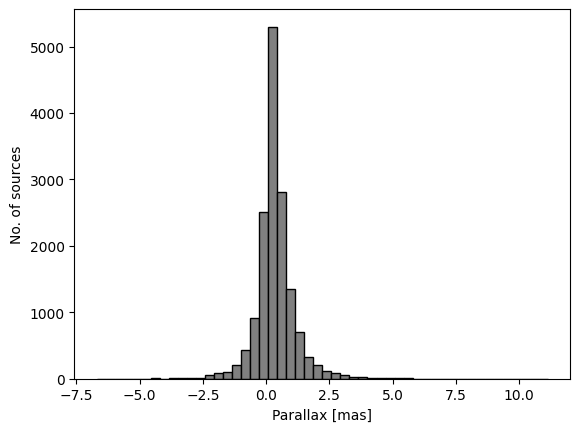

In [44]:
plx = results['parallax']

plt.hist(plx,bins=50,facecolor='grey',edgecolor='k')
#plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

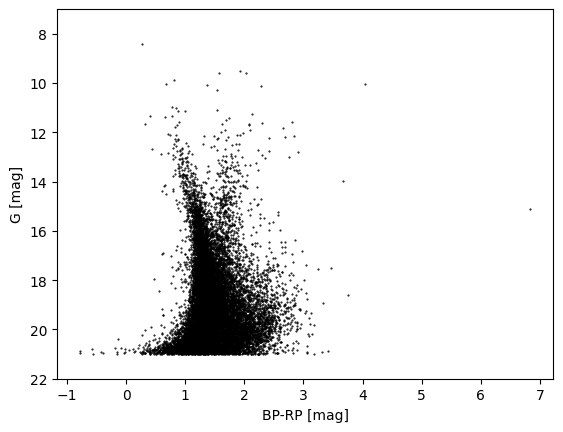

In [45]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)

plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

In [46]:
import numpy as np

In [47]:
members=np.where((pmra>-3.2)&(pmra<-2.4)&(pmdec>-1.6)&(pmdec<-0.9)&(plx>0.28)&(plx<0.52))

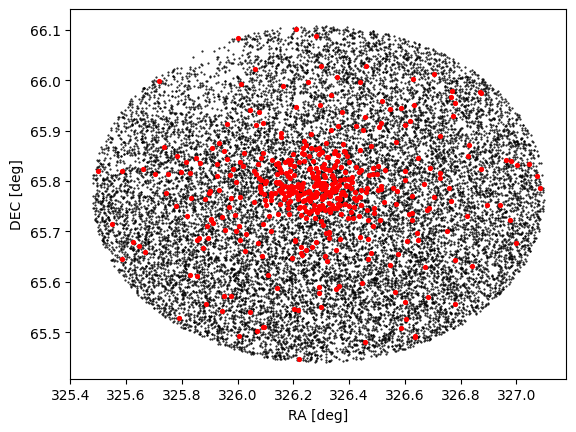

In [48]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)
plt.scatter(ra[members], dec[members], color='r',marker='.', s=30)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

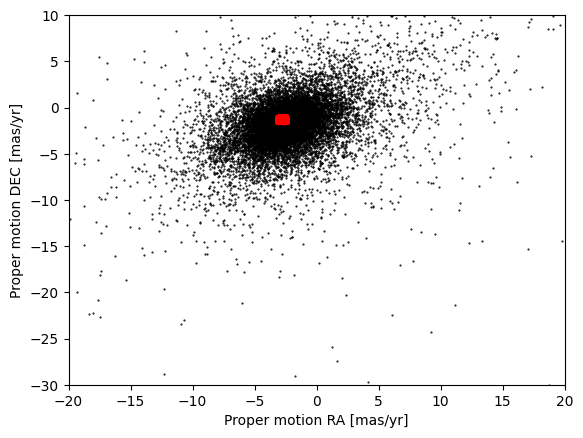

In [49]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)
plt.scatter(pmra[members], pmdec[members], color='r',marker='.', s=30)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

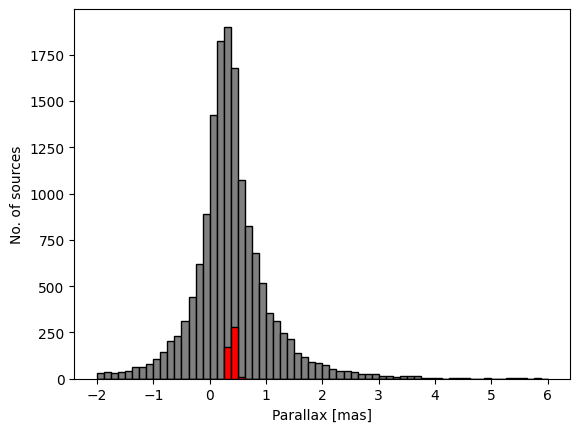

In [50]:
plx = results['parallax']

plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')
plt.hist(plx[members],bins=64,range=[-2,6], facecolor='r',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

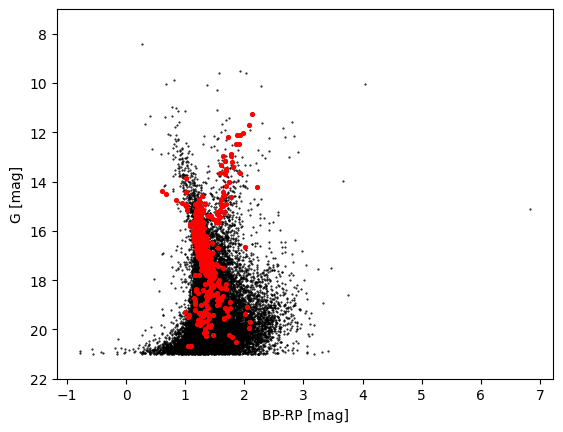

In [51]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)
plt.scatter(color[members], gmag[members], color='r',marker='.', s=30)


plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

##1.3 NGC 6791

In [52]:
query_cone = """SELECT
source_id, ra, dec, pmra, pmdec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
  POINT(ra, dec),
  CIRCLE(290.221755, 37.771895, 0.33332))
"""

job = Gaia.launch_job_async(query_cone)
results = job.get_results()
results

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,deg,deg,mas / yr,mas / yr,mas,mag,mag,mag
int64,float64,float64,float64,float64,float64,float32,float32,float32
2052605625704548992,290.5577513084944,37.89887909783157,--,--,--,21.166067,--,--
2052605209092630272,290.55165119369514,37.84323678128178,-3.434218536737321,-7.3677355122929775,0.014567139077958466,18.716566,19.303547,18.027563
2052591808799383040,290.6045049780189,37.74580213356729,--,--,--,20.743559,--,--
2052610023758576512,290.46914851881024,37.9895732670867,-0.7747685835518083,-5.884374780765095,0.13872635141943213,19.000107,19.601915,18.279919
2052609645793869056,290.4789325850893,37.953503098300466,1.4865118594615019,-0.7896936420162888,4.004761934403881,20.89911,21.048937,19.827898
2052609783236393088,290.49684823628917,37.98858946163832,5.266916470993408,-6.3253411538370585,1.1187812476438213,20.202375,21.358255,19.027445
2052605247754605440,290.5635463058765,37.86316388939613,-2.677093148238841,-7.705956312195838,0.25000952481672334,16.54703,17.053242,15.892645
2052609675858898304,290.5010589862245,37.95141774477937,-0.018239206956110532,-1.4850324055354605,0.5159247246798939,17.364819,17.937819,16.604952


In [53]:
filename = 'NGC6791_gaiadr3.fits'
results.write(filename, overwrite=True)

In [54]:
from os.path import getsize

MB = 1024 * 1024
getsize(filename) / MB

1.6424560546875

In [55]:
from astropy.table import Table

filename = 'NGC6791_gaiadr3.fits'
results = Table.read(filename)

results.info

<Table length=28509>
      name        dtype    unit                              description                                class     n_bad
---------------- ------- -------- ------------------------------------------------------------------ ------------ -----
       source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn     0
              ra float64      deg                                                    Right ascension       Column     0
             dec float64      deg                                                        Declination       Column     0
            pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn  2253
           pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn  2253
        parallax float64      mas                                                           Parallax MaskedColumn  2253
 phot_g_mean_mag fl

In [56]:
import matplotlib.pyplot as plt

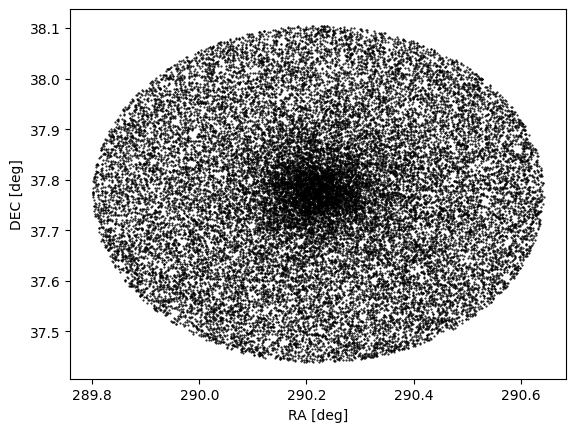

In [57]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

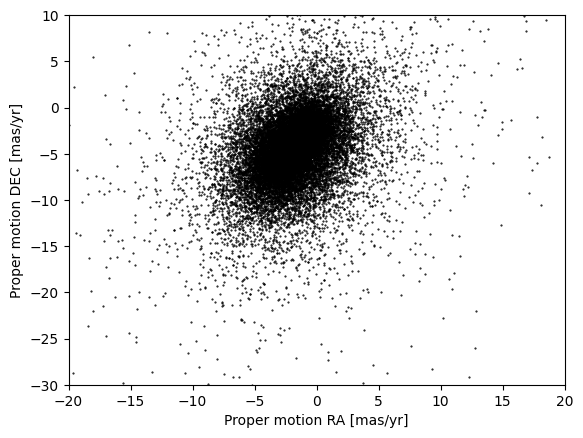

In [58]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

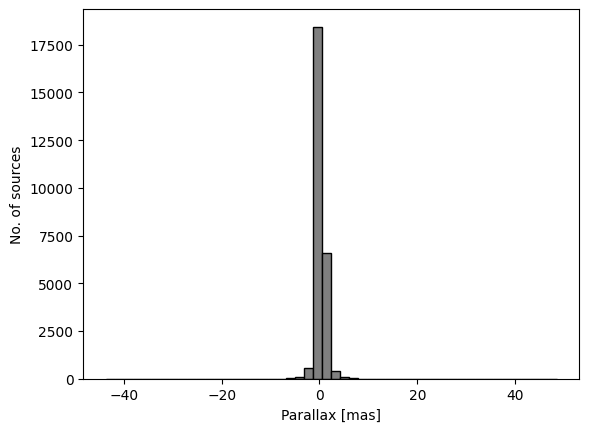

In [59]:
plx = results['parallax']

plt.hist(plx,bins=50,facecolor='grey',edgecolor='k')
#plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

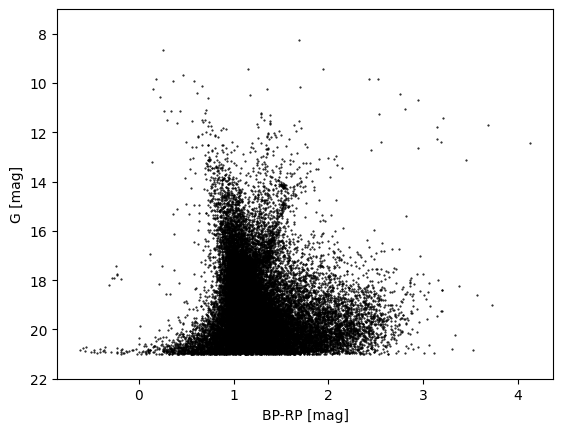

In [60]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)

plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);

In [61]:
import numpy as np

In [62]:
members=np.where((pmra>-0.9)&(pmra<0.15)&(pmdec>-2.8)&(pmdec<-1.6)&(plx>0)&(plx<0.42))

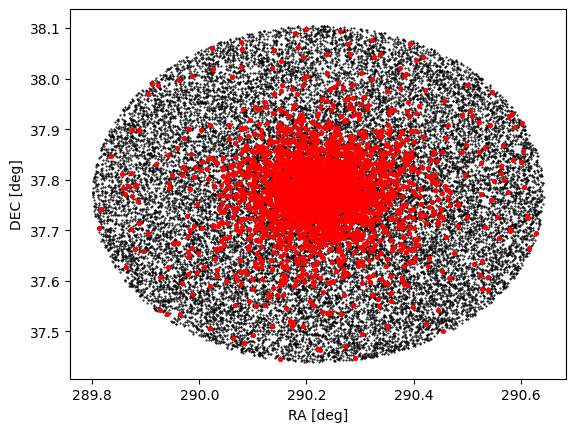

In [63]:
ra = results['ra']
dec = results['dec']
plt.scatter(ra, dec, color='k',marker='.', s=1)
plt.scatter(ra[members], dec[members], color='r',marker='.', s=30)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]');

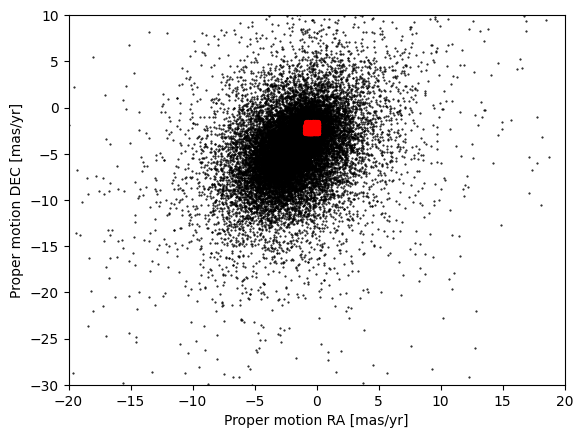

In [64]:
pmra = results['pmra']
pmdec = results['pmdec']
plt.scatter(pmra, pmdec, color='k',marker='.', s=1)
plt.scatter(pmra[members], pmdec[members], color='r',marker='.', s=30)

plt.xlim(-20,20)
plt.ylim(-30,10)

plt.xlabel('Proper motion RA [mas/yr]')
plt.ylabel('Proper motion DEC [mas/yr]');

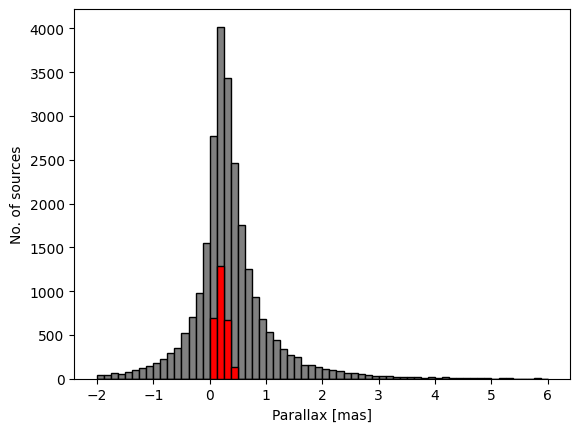

In [65]:
plx = results['parallax']

plt.hist(plx,bins=64,range=[-2,6], facecolor='grey',edgecolor='k')
plt.hist(plx[members],bins=64,range=[-2,6], facecolor='r',edgecolor='k')

plt.xlabel('Parallax [mas]')
plt.ylabel('No. of sources');

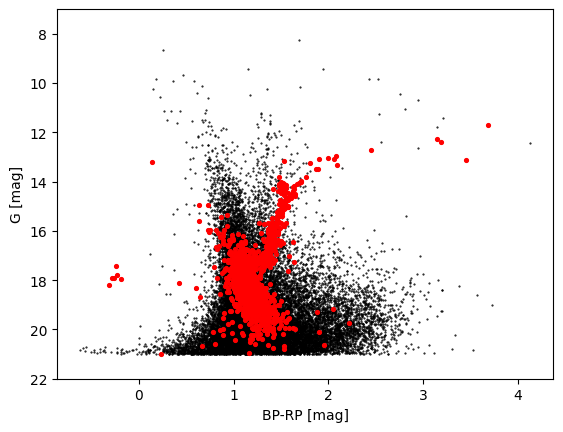

In [66]:
color = results['phot_bp_mean_mag']-results['phot_rp_mean_mag']
gmag = results['phot_g_mean_mag']

plt.scatter(color, gmag, color='k',marker='.', s=1)
plt.scatter(color[members], gmag[members], color='r',marker='.', s=30)


plt.xlabel('BP-RP [mag]')
plt.ylabel('G [mag]')

plt.ylim(22,7);